
# Correlação de Pearson 


## Objetivos da aula

1. Entender a **ideia de correlação de Pearson (r)** como medida de **associação linear** entre duas variáveis quantitativas.
2. Construir e ler **diagramas de dispersão (scatterplots)**.
3. Calcular o **coeficiente r** e  para testar se a correlação é diferente de zero.
4. Ver como **outliers** podem afetar a correlação.
5. Explorar uma **matriz de correlação** entre várias variáveis numéricas.


## 1. Preparação do ambiente

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Layout básico dos gráficos
sns.set_theme(context="notebook", style="whitegrid")


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



## 2. Carregar os dados (`penguins`)

Vamos usar um banco nativo do `seaborn`, o **penguins**, que contém medidas dos pinguins de três espécies.


In [19]:
# Carregar dataset nativo
df = sns.load_dataset('penguins').copy()

# Selecionar apenas colunas numéricas que usaremos hoje

cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

df_num = df[cols].dropna()  # remover linhas com valores ausentes

df_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0



## 3. Diagrama de dispersão (scatterplot)

O **scatterplot** é a melhor forma de visualizar a **associação** entre duas variáveis quantitativas.
A seguir, observamos a relação entre **comprimento do bico** (`bill_length_mm`) e **comprimento da nadadeira** (`flipper_length_mm`).


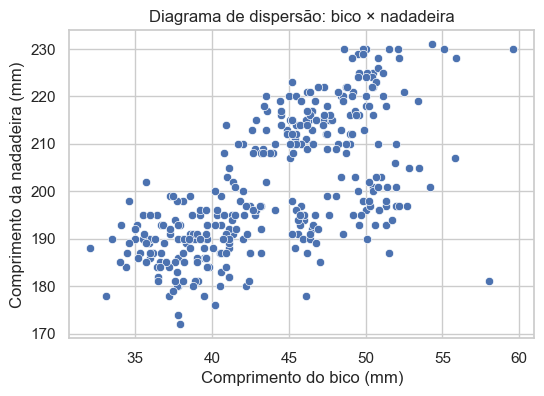

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_num, x='bill_length_mm', y='flipper_length_mm')
plt.xlabel("Comprimento do bico (mm)")
plt.ylabel("Comprimento da nadadeira (mm)")
plt.title("Diagrama de dispersão: bico × nadadeira")
plt.show()



### 3.1. Acrescentando uma linha de tendência (opcional)

A função `sns.regplot` desenha o scatter e ajusta uma **linha reta** (regressão linear simples), ajudando a ver a **direção** da associação.


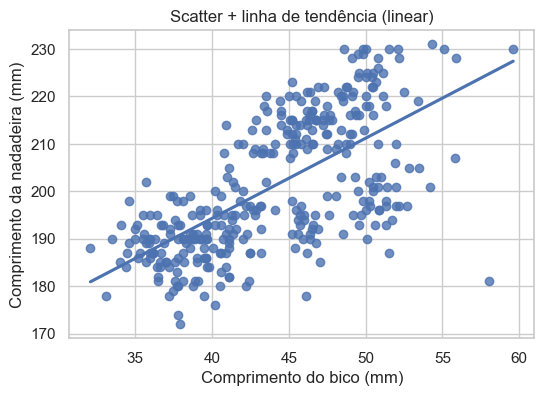

In [13]:
plt.figure(figsize=(6, 4))
sns.regplot(data=df_num, x='bill_length_mm', y='flipper_length_mm', ci=None)  # sem faixa de IC para simplificar
plt.xlabel("Comprimento do bico (mm)")
plt.ylabel("Comprimento da nadadeira (mm)")
plt.title("Scatter + linha de tendência (linear)")
plt.show()



## 4. Correlação de Pearson (r)

O coeficiente **r** mede a **força e direção da relação linear** entre duas variáveis.  
Valores de **r** variam de **-1** a **+1**:

- r próximo de **+1** → associação linear **positiva** forte  
- r próximo de **0** → **fraca ou inexistente** relação linear  
- r próximo de **-1** → associação linear **negativa** forte

A seguir, calculamos **r** para `bill_length_mm` × `flipper_length_mm`.


In [26]:
r = df_num['bill_length_mm'].corr(df_num['flipper_length_mm'], method='pearson')


## 5. Efeito de outliers

**Outliers** podem distorcer o **r**. Vamos inserir **um ponto extremo artificial** e comparar o r **antes** e **depois**


r sem outlier  : 0.656
r com outlier  : 0.528 (um único ponto extremo já mudou o r)


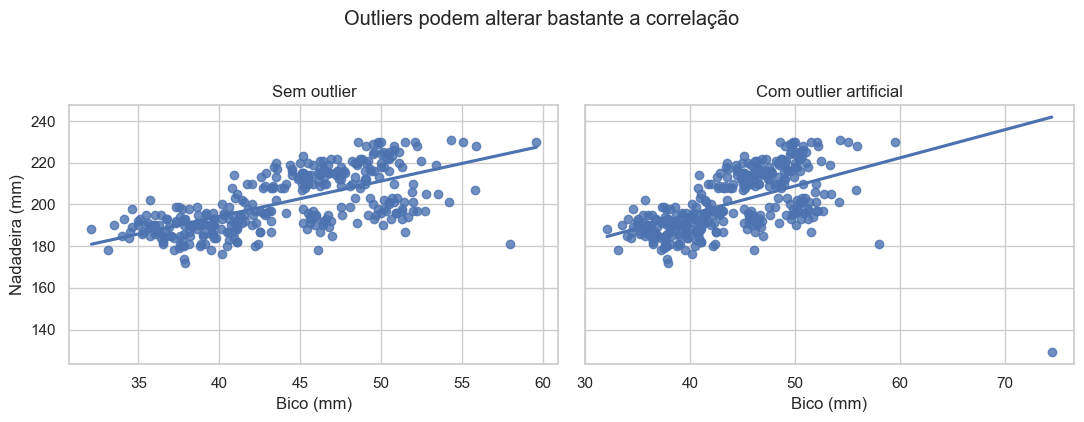

In [32]:

# opcional: df_num com mais colunas numéricas, se precisar em outros trechos
df_num = df[['bill_length_mm', 'flipper_length_mm', 'bill_depth_mm', 'body_mass_g']].dropna()


base = df_num[['bill_length_mm', 'flipper_length_mm']].dropna()


r0 = base['bill_length_mm'].corr(base['flipper_length_mm'], method='pearson')

# 4) Adicionar um outlier artificial e recalcular r
df_out = base.copy()
outlier = pd.DataFrame({
    'bill_length_mm': [base['bill_length_mm'].max()*1.25],
    'flipper_length_mm': [base['flipper_length_mm'].min()*0.75]
})
df_out = pd.concat([df_out, outlier], ignore_index=True)

r1 = df_out['bill_length_mm'].corr(df_out['flipper_length_mm'], method='pearson')

print(f"r sem outlier  : {r0:.3f}")
print(f"r com outlier  : {r1:.3f} (um único ponto extremo já mudou o r)")


# 5) Visualização
fig, axes = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
sns.regplot(ax=axes[0], data=base, x='bill_length_mm', y='flipper_length_mm', ci=None)
axes[0].set_title("Sem outlier")
axes[0].set_xlabel("Bico (mm)")
axes[0].set_ylabel("Nadadeira (mm)")

sns.regplot(ax=axes[1], data=df_out, x='bill_length_mm', y='flipper_length_mm', ci=None)
axes[1].set_title("Com outlier artificial")
axes[1].set_xlabel("Bico (mm)")
axes[1].set_ylabel("")

plt.suptitle("Outliers podem alterar bastante a correlação", y=1.05)
plt.tight_layout()
plt.show()



## 6. Matriz de correlação entre várias variáveis

A matriz de correlação mostra os **pares** de correlação entre várias variáveis numéricas.


In [33]:
corr = df_num.corr(numeric_only=True, method='pearson')
corr


,bill_length_mm,flipper_length_mm,bill_depth_mm,body_mass_g
bill_length_mm,1.000000,0.656181,-0.235053,0.595110
flipper_length_mm,0.656181,1.000000,-0.583851,0.871202
bill_depth_mm,-0.235053,-0.583851,1.000000,-0.471916
body_mass_g,0.595110,0.871202,-0.471916,1.000000



### 6.1. Heatmap (opcional)


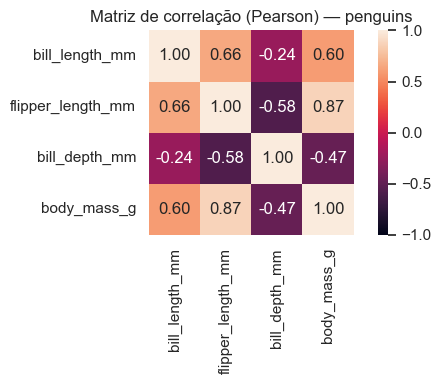

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, square=True, cbar=True)
plt.title("Matriz de correlação (Pearson) — penguins")
plt.tight_layout()
plt.show()


### Bairros Rio

In [6]:
rj = pd.read_csv('bairros_rio.csv')

rj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bairro_IPP      158 non-null    object 
 1   GPP             158 non-null    object 
 2   RegAdmin        158 non-null    object 
 3   Dom             158 non-null    int64  
 4   DomFav          158 non-null    int64  
 5   Pop2000         158 non-null    int64  
 6   PopF            158 non-null    int64  
 7   PopM            158 non-null    int64  
 8   RDom_Media      158 non-null    float64
 9   Rlg_CAR         158 non-null    int64  
 10  Rlg_EMis_pc     158 non-null    float64
 11  Rlg_EPtc_pc     158 non-null    float64
 12  AEstu_Media     158 non-null    int64  
 13  pct_favela      158 non-null    float64
 14  pct_evangelico  158 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 18.6+ KB


In [15]:
cols = ['RDom_Media', 'pct_favela', 'pct_evangelico', 'AEstu_Media', 'Pop2000']

df_num = rj[cols].dropna()  # remover linhas com valores ausentes

df_num.head()

,RDom_Media,pct_favela,pct_evangelico,AEstu_Media,Pop2000
0,527.31,0.000000,10.921270,7,12346
1,171.63,0.838866,21.716755,4,24650
2,380.68,0.069928,12.425652,7,7243
3,719.70,0.353236,12.108432,7,8254
4,318.98,0.169031,26.574022,6,53808


In [16]:
corr = df_num.corr(numeric_only=True, method='pearson')
corr


,RDom_Media,pct_favela,pct_evangelico,AEstu_Media,Pop2000
RDom_Media,1.000000,-0.328211,-0.630008,0.843369,-0.037047
pct_favela,-0.328211,1.000000,0.278068,-0.544437,0.000739
pct_evangelico,-0.630008,0.278068,1.000000,-0.719116,0.215195
AEstu_Media,0.843369,-0.544437,-0.719116,1.000000,-0.072094
Pop2000,-0.037047,0.000739,0.215195,-0.072094,1.000000


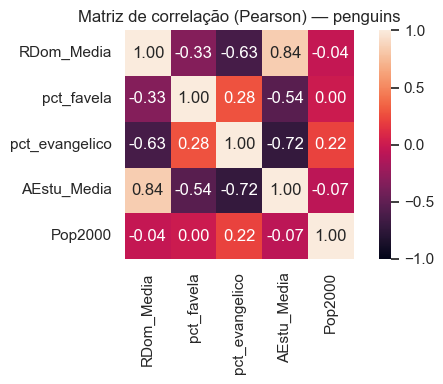

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, square=True, cbar=True)
plt.title("Matriz de correlação (Pearson) — penguins")
plt.tight_layout()
plt.show()


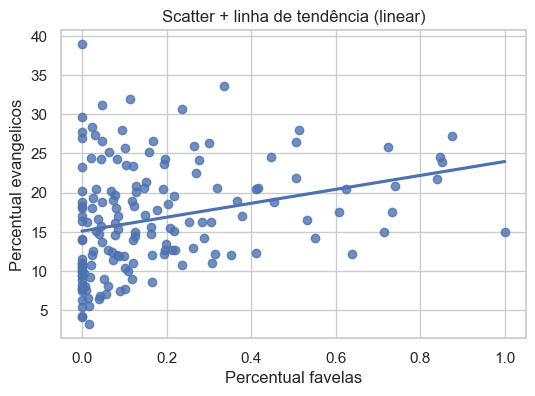

In [19]:
plt.figure(figsize=(6, 4))
sns.regplot(data=df_num, x='pct_favela', y='pct_evangelico', ci=None)  # sem faixa de IC para simplificar
plt.xlabel("Percentual favelas")
plt.ylabel("Percentual evangelicos")
plt.title("Scatter + linha de tendência (linear)")
plt.show()
